In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

**Extract stock data**

In [4]:
#Extract historical stock prices from yahoo finance
ticker="GOOGL"
stock_data=pd.DataFrame()
stock_data[ticker]=yf.download(ticker,start="2000-1-1",end="2019-12-31")["Adj Close"]


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

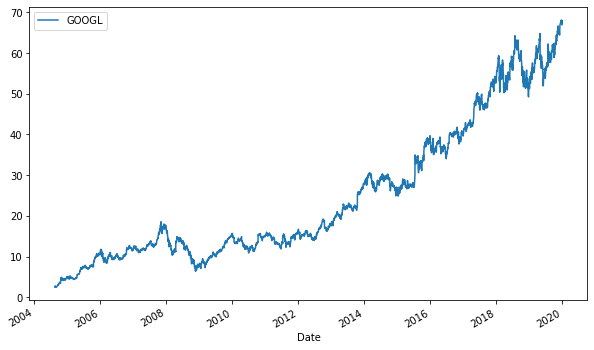

In [5]:
#Plot GOOGLE closing prices
stock_data.plot(figsize=(10,6))


**Calculate Historical returns and Statistical Measures**

<AxesSubplot:xlabel='Date'>

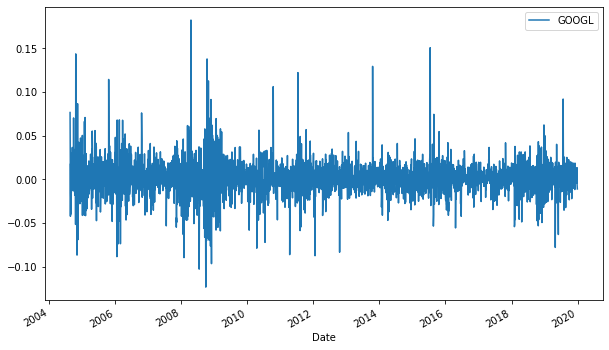

In [6]:
# calculate historical log returns
log_returns=np.log(1+stock_data.pct_change())

# Show all log returns
log_returns.plot(figsize=(10,6))


<AxesSubplot:ylabel='Density'>

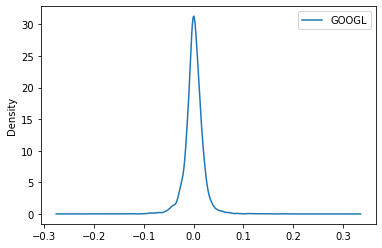

In [7]:
# show the distribution of the returns
log_returns.plot.density()

In [10]:
# calculate statistical measures of the log retruns
mean=log_returns.mean()
variance=log_returns.var()
STD=log_returns.std()

**Simulate Future Daily Returns and Future Prices**

(array([  1.,   0.,   2.,   1.,   0.,   5.,   1.,   3.,   6.,   7.,   4.,
          7.,   8.,  14.,   7.,  17.,  15.,  23.,  34.,  35.,  33.,  47.,
         48.,  69.,  73.,  74.,  85.,  93., 102., 112., 113., 140., 167.,
        151., 166., 186., 196., 218., 219., 227., 244., 240., 283., 250.,
        272., 283., 270., 302., 308., 277., 278., 274., 234., 301., 252.,
        268., 256., 219., 211., 220., 203., 185., 158., 167., 153., 159.,
        121., 107.,  94.,  65.,  82.,  70.,  60.,  63.,  59.,  48.,  47.,
         26.,  29.,  25.,  16.,  19.,  11.,  18.,  10.,  15.,   9.,   8.,
          4.,   3.,   3.,   4.,   0.,   3.,   2.,   0.,   0.,   1.,   1.,
          1.]),
 array([-3.5044402 , -3.432292  , -3.3601438 , -3.28799561, -3.21584741,
        -3.14369921, -3.07155101, -2.99940281, -2.92725461, -2.85510641,
        -2.78295822, -2.71081002, -2.63866182, -2.56651362, -2.49436542,
        -2.42221722, -2.35006903, -2.27792083, -2.20577263, -2.13362443,
        -2.06147623, -1.98

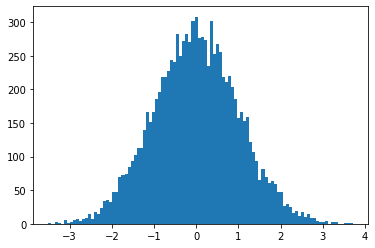

In [11]:
# generating 10,000 random numbers between 0 and 1
random_numbers=np.random.rand(10000)

# use re randomly generated numbers to sample from a normal distribution
normal_random_numbers=norm.ppf(random_numbers)

# plot each of the 10,000 randomly generated numbers from the normal distribution
plt.hist(normal_random_numbers,bins=100)

In [14]:
# simulate future daily returns
t_interval=252
simulations=10000
daily_logreturns_simulated=STD.values*norm.ppf(np.random.rand(t_interval,simulations))

# convert log retruns back to simple returns
daily_simplretruns_simulated=np.exp(daily_logreturns_simulated)
daily_simplretruns_simulated.shape

(252, 10000)

In [15]:
# identify the last stock price in the historical dataframe, December 2019
last_price=stock_data.iloc[-1]

# prepare a matrix pricelist for the price simulations
price_list=np.zeros_like(daily_simplretruns_simulated)

# set the first row to the starting price
price_list[0]=last_price

price_list

array([[66.98549652, 66.98549652, 66.98549652, ..., 66.98549652,
        66.98549652, 66.98549652],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

 ...]

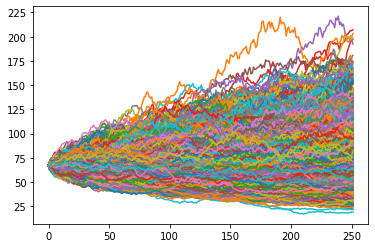

In [24]:
# fill the rest of the pricelist matrix with simulated prices
for t in range(1,t_interval):
    price_list[t]=price_list[t-1]*daily_simplretruns_simulated[t]
    
# plot the simulated future GOOGL prices
plt.plot(price_list)

**Including Drift**

 ...]

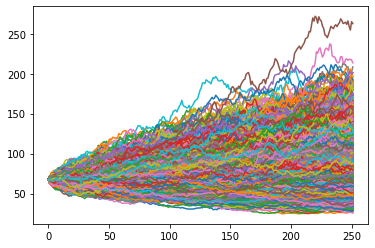

In [25]:
# calculate drift of log returns
drift=mean-(0.5*variance)

# simulate future daily returns
t_interval=252
simulations=10000

daily_logreturns_simulated=STD.values*norm.ppf(np.random.rand(t_interval,simulations))
daily_logreturns_simulated_withdrift=daily_logreturns_simulated + drift.values

# convert log retruns back to simple returns
daily_simplretruns_simulated_withdrift=np.exp(daily_logreturns_simulated_withdrift)

# identify the last stock price in the historical dataframe, December 2019
last_price=stock_data.iloc[-1]

# prepare a matrix pricelist for the price simulations
price_list=np.zeros_like(daily_simplretruns_simulated_withdrift)

# set the first row to the starting price
price_list[0]=last_price

# fill the rest of the pricelist matrix with simulated prices
for t in range(1,t_interval):
    price_list[t]=price_list[t-1]*daily_simplretruns_simulated_withdrift[t]
    
# plot the simulated future GOOGL prices
plt.plot(price_list)

**Examine the worst, average, best scenarios and the probability distribution**


In [35]:
# calculate worst, average and best scenarios
worstSim=round(price_list[-1].min(),2)
AverageSim=round(price_list[-1].mean(),2)
BestSim=round(price_list[-1].max(),2)

print ("Best and Worst Cases")
print(f"Worst Simulation $/share: {worstSim}")
print(f"Average Simulation $/share: {AverageSim}")
print(f"Best Simulation $/share: {BestSim}")


Best and Worst Cases
Worst Simulation $/share: 25.85
Average Simulation $/share: 82.65
Best Simulation $/share: 262.72


In [32]:
# 1 standard deviation confidence interval
Mean_Day252Prices=price_list[-1].mean()
SD_Day252Prices=price_list[-1].std()
UpperInterval_1SD=Mean_Day252Prices + 1* SD_Day252Prices
LowerInterval_1SD=Mean_Day252Prices - 1* SD_Day252Prices
# 2 standard deviation confidence interval
UpperInterval_2SD=Mean_Day252Prices + 2* SD_Day252Prices
LowerInterval_2SD=Mean_Day252Prices - 2* SD_Day252Prices
#print the tittle confidence interval and the results
print("\n" + "Confidence Intervals")
print(f"1 Sigma (1 S.D.): 68% confident that price after 252 days will fall between $ {round(LowerInterval_1SD,2)} and $ {round(UpperInterval_1SD,2)}")
print(f"2 Sigma (2 S.D.): 95% confident that price after 252 days will fall between $ {round(LowerInterval_2SD,2)} and $ {round(UpperInterval_2SD,2)}")


Confidence Intervals
1 Sigma (1 S.D.): 68% confident that price after 252 days will fall between $ 57.68 and $ 107.62
2 Sigma (2 S.D.): 95% confident that price after 252 days will fall between $ 32.7 and $ 132.59
